     0    1
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9
         a    b
point          
p1     2.5  2.4
p2     0.5  0.7
p3     2.2  2.9
p4     1.9  2.2
p5     3.1  3.0
p6     2.3  2.7
p7     2.0  1.6
p8     1.0  1.1
p9     1.5  1.6
p10    1.1  0.9
           p1        p2        p3        p4        p5        p6        p7  \
p1   0.000000  2.624881  0.583095  0.632456  0.848528  0.360555  0.943398   
p2   2.624881  0.000000  2.780288  2.051828  3.471311  2.690725  1.749286   
p3   0.583095  2.780288  0.000000  0.761577  0.905539  0.223607  1.315295   
p4   0.632456  2.051828  0.761577  0.000000  1.442221  0.640312  0.608276   
p5   0.848528  3.471311  0.905539  1.442221  0.000000  0.854400  1.780449   
p6   0.360555  2.690725  0.223607  0.640312  0.854400  0.000000  1.140175   
p7   0.943398  1.749286  1.315295  0.608276  1.780449  1.140175  0.000000   
p8   1.984943  0.640312  2.163331  1.421267  2.831960  2.061

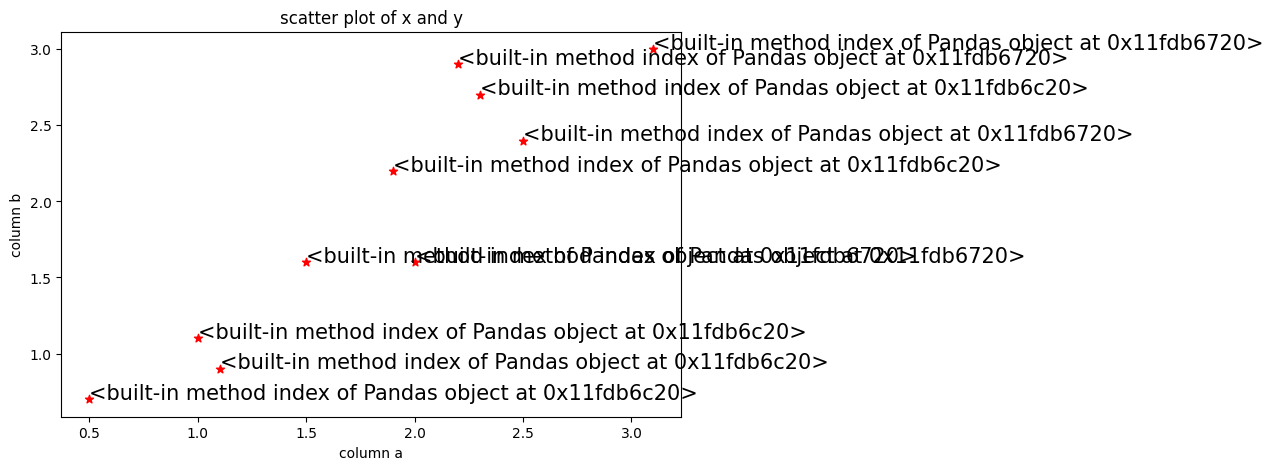

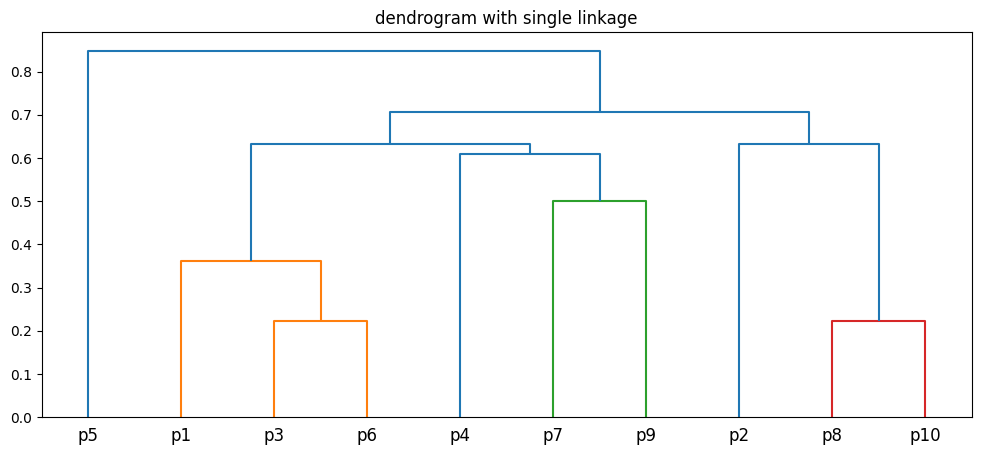

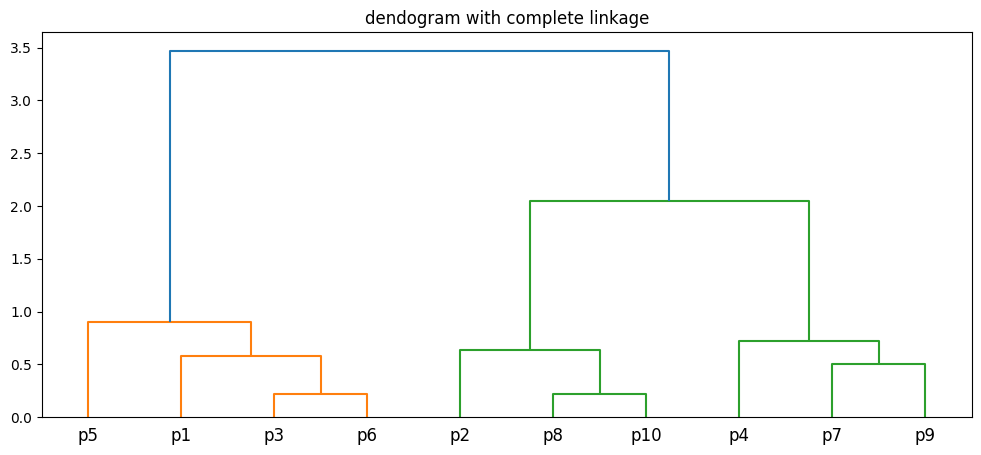

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform,pdist

data=np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
data=pd.DataFrame(data)
print(data)
a=data[0]
b=data[1]
point=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10']
data=pd.DataFrame({'point':point,'a':np.round(a,2),'b':np.round(b,2)})
data=data.set_index('point')
print(data)

plt.figure(figsize=(8,5))
plt.scatter(data['a'],data['b'],c='r',marker='*')
plt.xlabel('column a')
plt.ylabel('column b')
plt.title('scatter plot of x and y')
for j in data.itertuples():
  plt.annotate(j.index,(j.a,j.b),fontsize=15)

dist1=pd.DataFrame(squareform(pdist(data[['a','b']]),'euclidean'),columns=data.index.values,index=data.index.values)
print(dist1)

plt.figure(figsize=(12,5))
plt.title("dendrogram with single linkage")
dend=shc.dendrogram(shc.linkage(data[['a','b']],method='single'),labels=data.index)

plt.figure(figsize=(12,5))
plt.title("dendogram with complete linkage")
dend=shc.dendrogram(shc.linkage(data[['a','b']],method='complete'),labels=data.index)